# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp():
    """
    Build your own model
    """
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 128, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_nuerons in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_nuerons, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_nuerons, activation="relu", name="hidden_layer"+str(i+1))(x)
    output_layer = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    return model

In [8]:
## 超參數設定
"""
Set your required experiment parameters
"""
opts=dict()
opts['SGD'] = keras.optimizers.SGD()
opts['RMSprop'] = keras.optimizers.RMSprop()
opts['Adagrad'] = keras.optimizers.Adagrad()
opts['Adam'] = keras.optimizers.Adam()

OPTS = list(opts.keys())
print(OPTS)
EPOCHS = 50
BATCH_SIZE = 256


['SGD', 'RMSprop', 'Adagrad', 'Adam']


In [9]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for opt in OPTS:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment on %s" % opt)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = opts[opt]
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    results[opt] = {'train-loss': train_loss,
                    'valid-loss': valid_loss,
                    'train-acc': train_acc,
                    'valid-acc': valid_acc}

Experiment on SGD
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 903,178
Trainable params: 903,178
Non-trainable params: 0
______________________________

Epoch 50/50
196/196 [==============================] - 2s 11ms/step - loss: 1.2559 - accuracy: 0.5566 - val_loss: 1.4392 - val_accuracy: 0.4814
Experiment on RMSprop
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)      

Epoch 49/50
196/196 [==============================] - 3s 18ms/step - loss: 0.8225 - accuracy: 0.7040 - val_loss: 1.9497 - val_accuracy: 0.4823
Epoch 50/50
196/196 [==============================] - 3s 16ms/step - loss: 0.8112 - accuracy: 0.7052 - val_loss: 2.0043 - val_accuracy: 0.4780
Experiment on Adagrad
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_l

Epoch 48/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5573 - accuracy: 0.4556 - val_loss: 1.5644 - val_accuracy: 0.4522
Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5531 - accuracy: 0.4555 - val_loss: 1.5643 - val_accuracy: 0.4534
Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5488 - accuracy: 0.4576 - val_loss: 1.5858 - val_accuracy: 0.4446
Experiment on Adam
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________

Epoch 47/50
196/196 [==============================] - 3s 14ms/step - loss: 0.6888 - accuracy: 0.7520 - val_loss: 1.7834 - val_accuracy: 0.5082
Epoch 48/50
196/196 [==============================] - 3s 13ms/step - loss: 0.6666 - accuracy: 0.7614 - val_loss: 1.8166 - val_accuracy: 0.5093
Epoch 49/50
196/196 [==============================] - 2s 13ms/step - loss: 0.6565 - accuracy: 0.7641 - val_loss: 1.8509 - val_accuracy: 0.5055
Epoch 50/50
196/196 [==============================] - 2s 13ms/step - loss: 0.6435 - accuracy: 0.7694 - val_loss: 1.9455 - val_accuracy: 0.4993


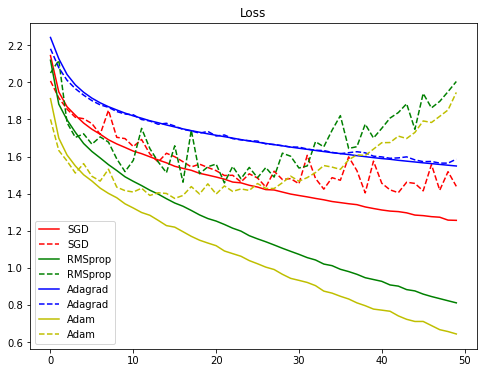

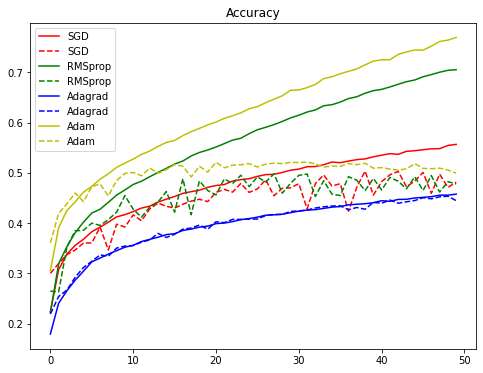

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()